In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

In [2]:
df = pd.read_csv("./data/match-stats/match-stats.csv")
df

,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
0,20/11/2022,Qatar,gs1,0,5,0,0.47,434,0.80,15,4,0,3,1,L
1,20/11/2022,Ecuador,gs1,2,6,3,0.53,486,0.84,15,2,0,4,3,W
2,21/11/2022,England,gs1,6,13,7,0.79,797,0.89,9,0,0,2,8,W
3,21/11/2022,Iran,gs1,2,8,3,0.21,215,0.66,14,2,0,2,0,L
4,21/11/2022,Senegal,gs1,0,15,4,0.46,385,0.79,13,2,0,2,6,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,14/12/2022,Semi Finalist 2,SF,0,0,0,0.00,0,0.00,0,0,0,0,0,NaN
122,15/12/2022,Semi Finalist 3,SF,0,0,0,0.00,0,0.00,0,0,0,0,0,NaN
123,15/12/2022,Semi Finalist 4,SF,0,0,0,0.00,0,0.00,0,0,0,0,0,NaN
124,17/12/2022,Finalist 1,Final,0,0,0,0.00,0,0.00,0,0,0,0,0,NaN


In [3]:
#take the data of all full time match

df2 = df[df.result.notnull()]
df2

,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
0,20/11/2022,Qatar,gs1,0,5,0,0.47,434,0.80,15,4,0,3,1,L
1,20/11/2022,Ecuador,gs1,2,6,3,0.53,486,0.84,15,2,0,4,3,W
2,21/11/2022,England,gs1,6,13,7,0.79,797,0.89,9,0,0,2,8,W
3,21/11/2022,Iran,gs1,2,8,3,0.21,215,0.66,14,2,0,2,0,L
4,21/11/2022,Senegal,gs1,0,15,4,0.46,385,0.79,13,2,0,2,6,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,01/12/2022,Maroko,gs3,2,6,2,0.41,373,0.79,14,0,0,4,2,W
84,02/12/2022,Japan,gs3,2,6,3,0.17,228,0.67,9,3,0,2,0,W
85,02/12/2022,Spain,gs3,1,12,5,0.83,1058,0.91,6,0,0,2,2,L
86,02/12/2022,Costa Rica,gs3,2,7,5,0.31,337,0.74,3,1,0,4,1,L


In [12]:
df2.describe()

,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,1.238636,10.977273,3.681818,0.500000,482.306818,0.805000,11.818182,1.602273,0.011364,1.977273,4.545455
std,1.356079,6.013352,2.628515,0.142684,163.695284,0.070205,4.311294,1.343693,0.106600,1.787423,2.896328
min,0.000000,0.000000,0.000000,0.170000,215.000000,0.570000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,2.000000,0.390000,372.250000,0.770000,9.000000,1.000000,0.000000,1.000000,2.000000
50%,1.000000,10.000000,3.000000,0.500000,473.500000,0.820000,11.500000,1.000000,0.000000,2.000000,4.500000
75%,2.000000,13.000000,5.000000,0.610000,557.250000,0.850000,15.000000,2.000000,0.000000,3.000000,6.000000
max,7.000000,32.000000,12.000000,0.830000,1058.000000,0.930000,23.000000,6.000000,1.000000,10.000000,14.000000


In [16]:
#change the result with numbers. L=0, D=1, W=2
result = {"L":0, "D":1, "W":2}
df2.result = [result[item] for item in df2.result]
df2

/tmp/ipykernel_10775/2741338219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.result = [result[item] for item in df2.result]


,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
0,20/11/2022,Qatar,gs1,0,5,0,0.47,434,0.80,15,4,0,3,1,0
1,20/11/2022,Ecuador,gs1,2,6,3,0.53,486,0.84,15,2,0,4,3,2
2,21/11/2022,England,gs1,6,13,7,0.79,797,0.89,9,0,0,2,8,2
3,21/11/2022,Iran,gs1,2,8,3,0.21,215,0.66,14,2,0,2,0,0
4,21/11/2022,Senegal,gs1,0,15,4,0.46,385,0.79,13,2,0,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,01/12/2022,Maroko,gs3,2,6,2,0.41,373,0.79,14,0,0,4,2,2
84,02/12/2022,Japan,gs3,2,6,3,0.17,228,0.67,9,3,0,2,0,2
85,02/12/2022,Spain,gs3,1,12,5,0.83,1058,0.91,6,0,0,2,2,0
86,02/12/2022,Costa Rica,gs3,2,7,5,0.31,337,0.74,3,1,0,4,1,0


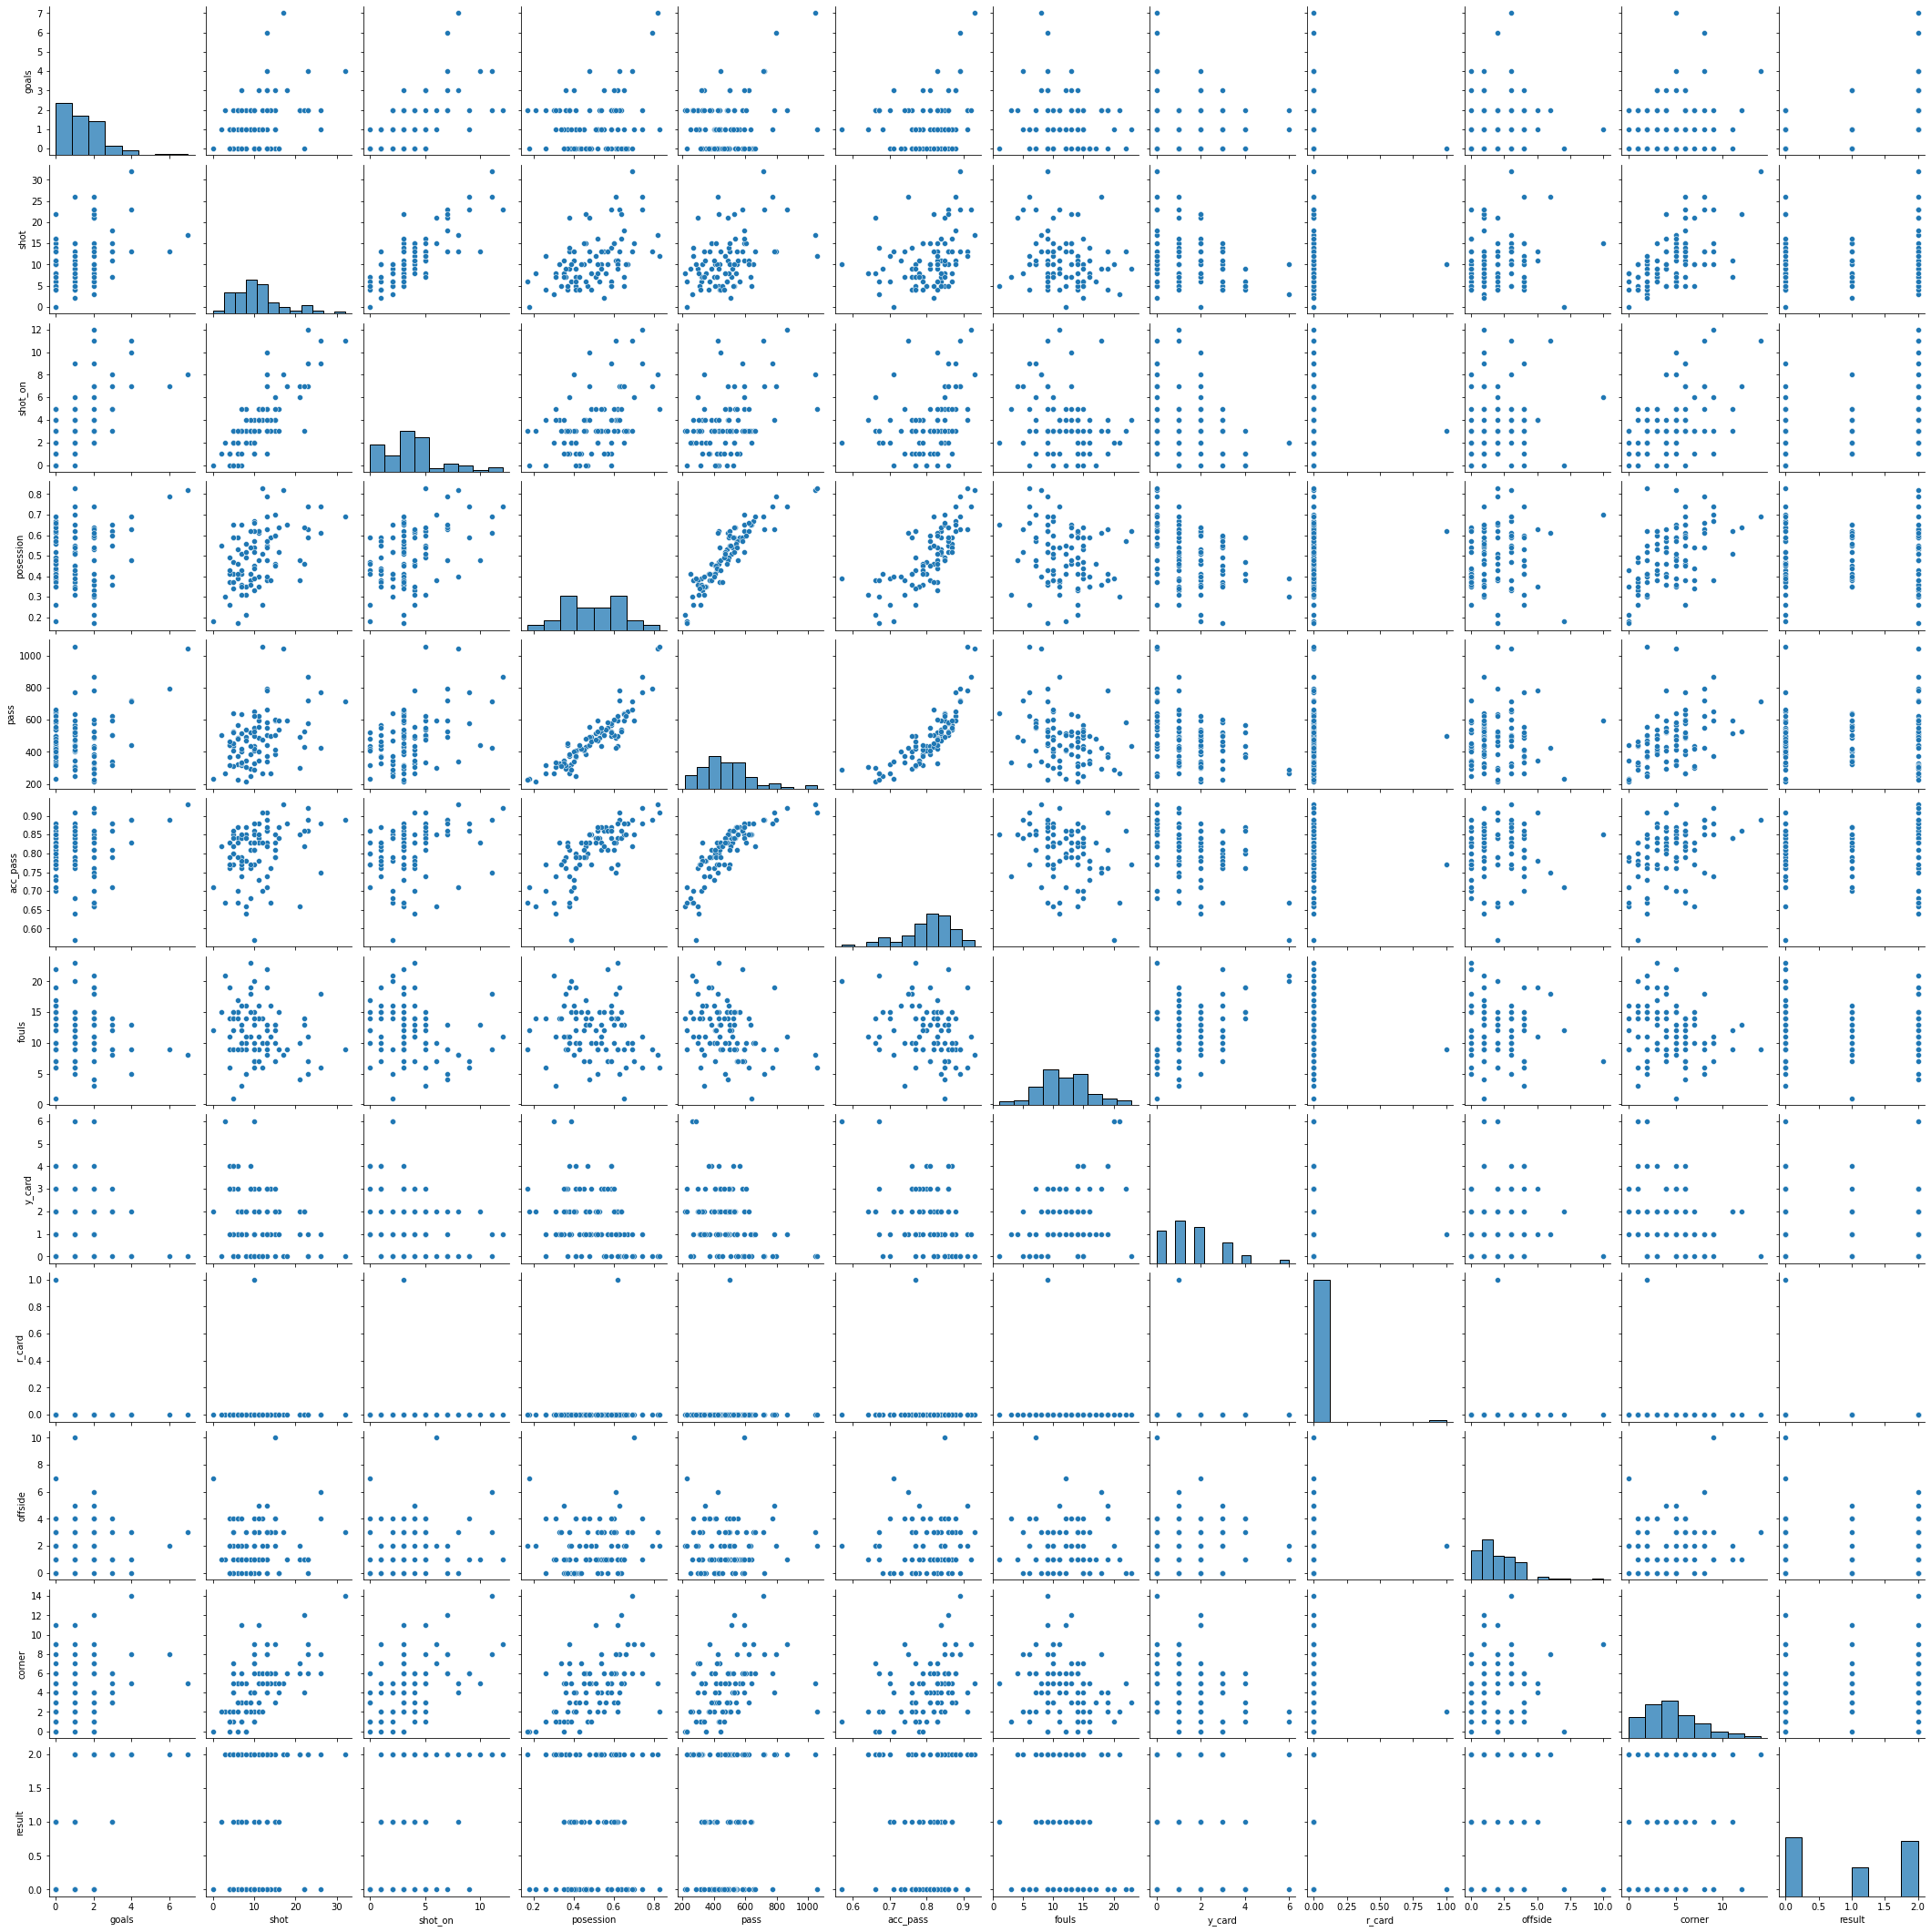

In [17]:
sns.pairplot(df2)

/tmp/ipykernel_10775/660108979.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<AxesSubplot:>

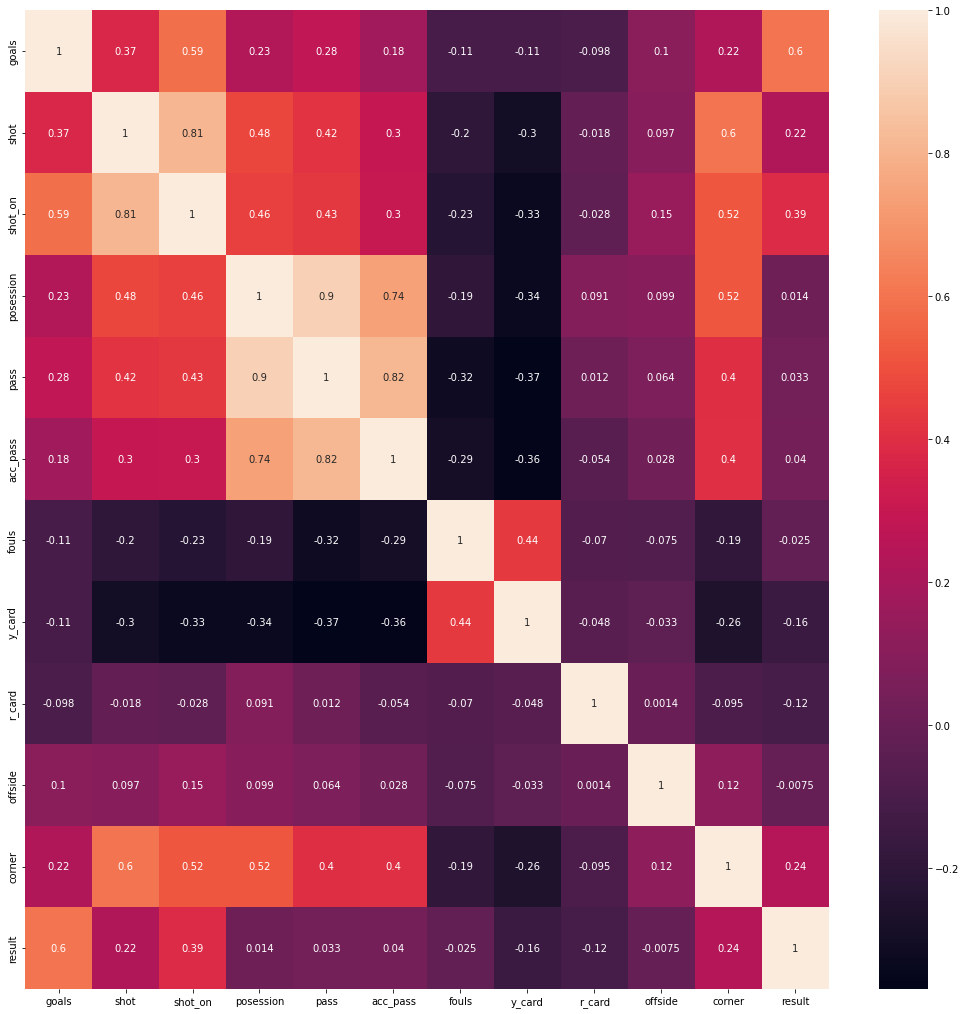

In [21]:
plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(), annot=True)

In [22]:
df_japan = df2[df2["nationalTeam"]=="Japan"]
df_japan

,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
19,23/11/2022,Japan,gs1,2,12,4,0.26,269,0.70,14,0,0,4,6,2
48,27/11/2022,Japan,gs2,0,13,3,0.57,582,0.86,22,3,0,0,5,0
84,02/12/2022,Japan,gs3,2,6,3,0.17,228,0.67,9,3,0,2,0,2


/tmp/ipykernel_10775/2844976787.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_japan = sns.heatmap(df_japan.corr(), annot=True)


Text(0.5, 1.0, 'Japan Correlation Heatmap')

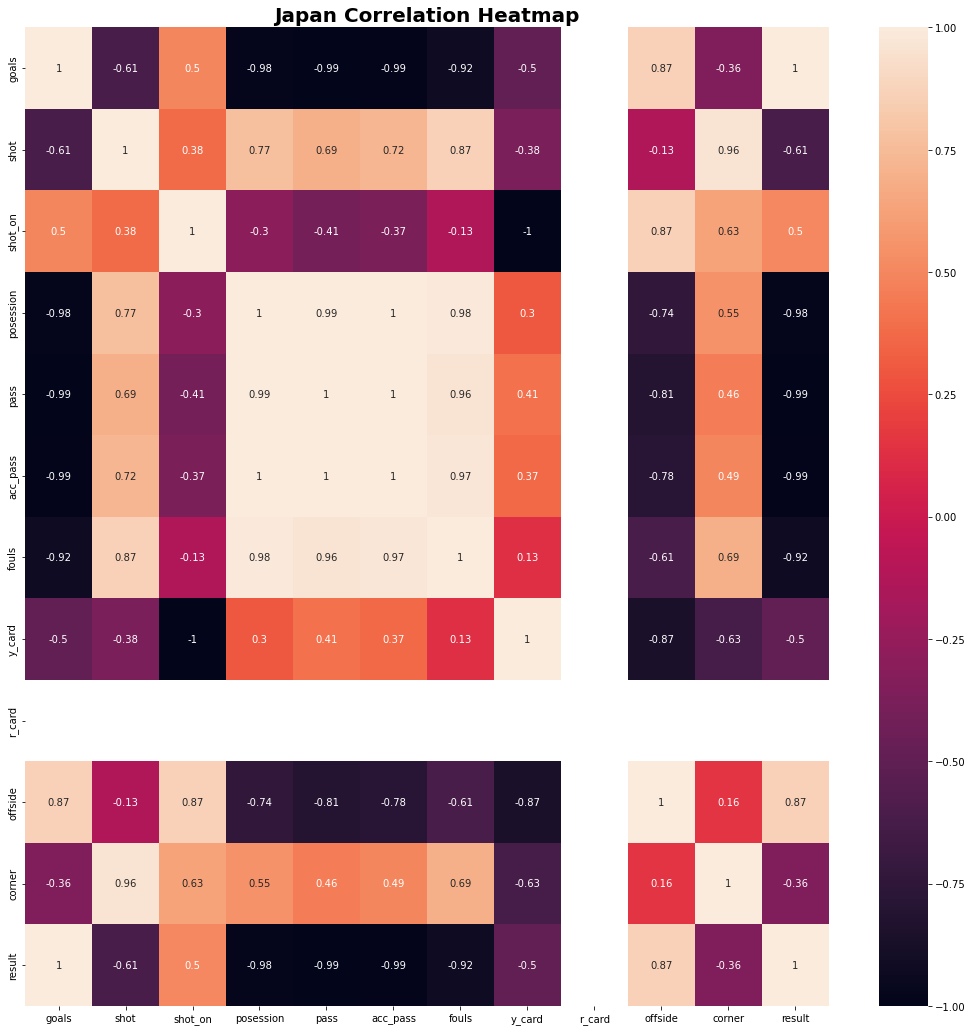

In [30]:
plt.figure(figsize=(18,18))
heatmap_japan = sns.heatmap(df_japan.corr(), annot=True)
heatmap_japan.set_title("Japan Correlation Heatmap", fontsize=20, weight='bold')